In [2]:
#coding:utf-8 #导入warnings包，利用过滤器来实现忽略警告语句。 import warnings warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

In [3]:
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ') 
Test_data = pd.read_csv('used_car_testA_20200313.csv', sep=' ')

In [4]:
## 2) 简略观察数据(head()+shape) 
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [5]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [7]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [5]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

# **总览数据概况**

In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [7]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [8]:
## 通过 .describe() 可以查看数值特征列的一些统计信息 
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


# 判断数据缺失和异常

In [10]:
## 1) 查看每列的存在nan情况 
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [11]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

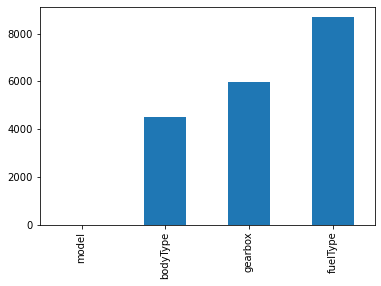

In [12]:
# nan可视化 
missing = Train_data.isnull().sum() 
missing = missing[missing > 0] 
missing.sort_values(inplace=True)
missing.plot.bar()

## 1.nan很少时可填充
## 2.当nan很多时可选择删除
## 3.树模型不必考虑缺失值，树可优化

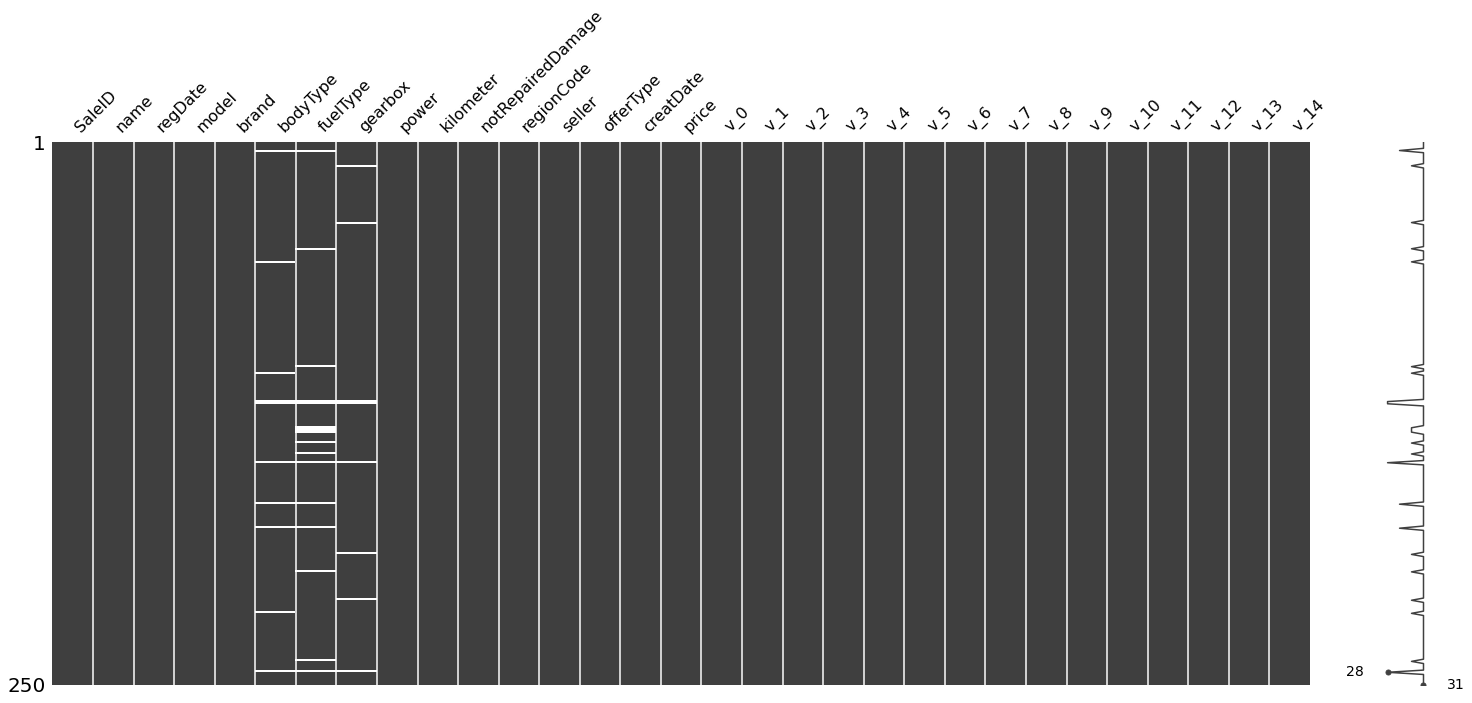

In [13]:
# 可视化看下缺省值 
msno.matrix(Train_data.sample(250))

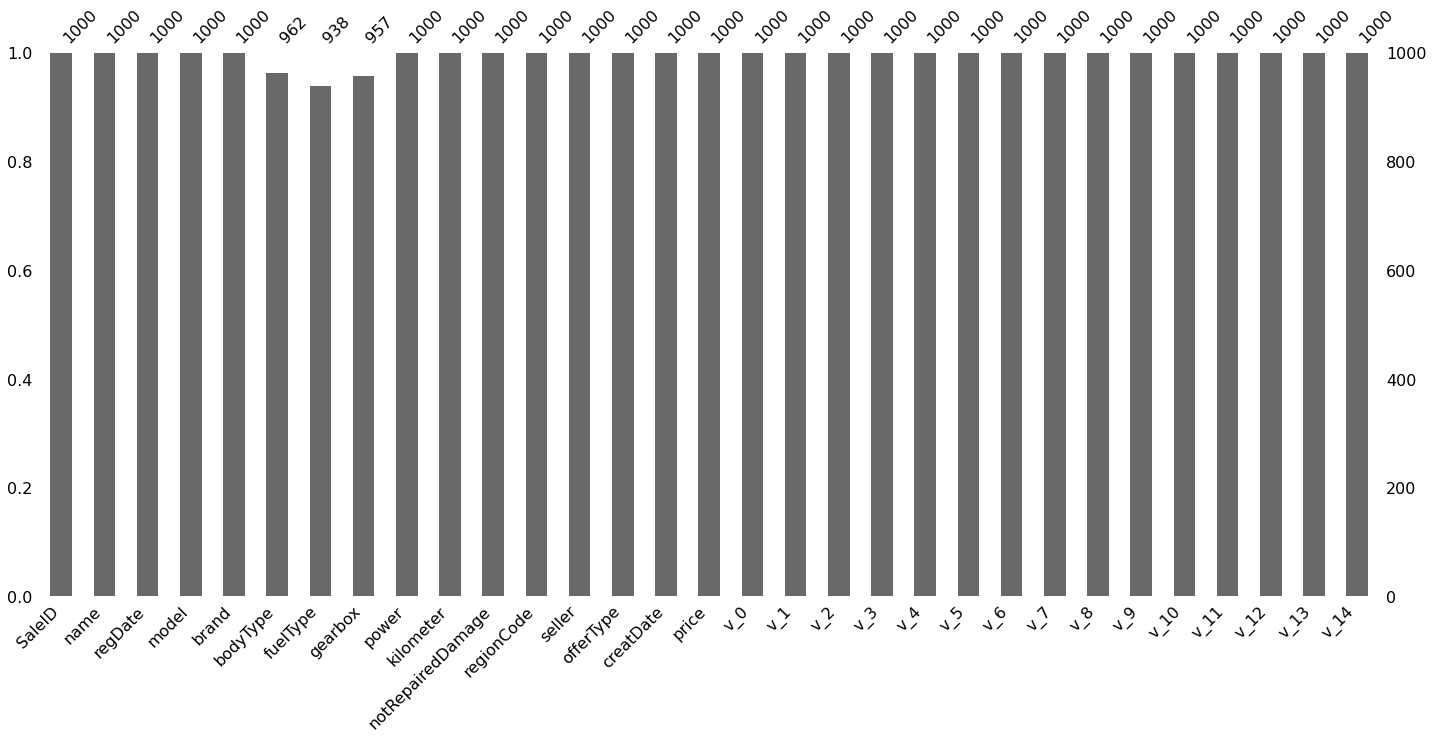

In [14]:
msno.bar(Train_data.sample(1000))

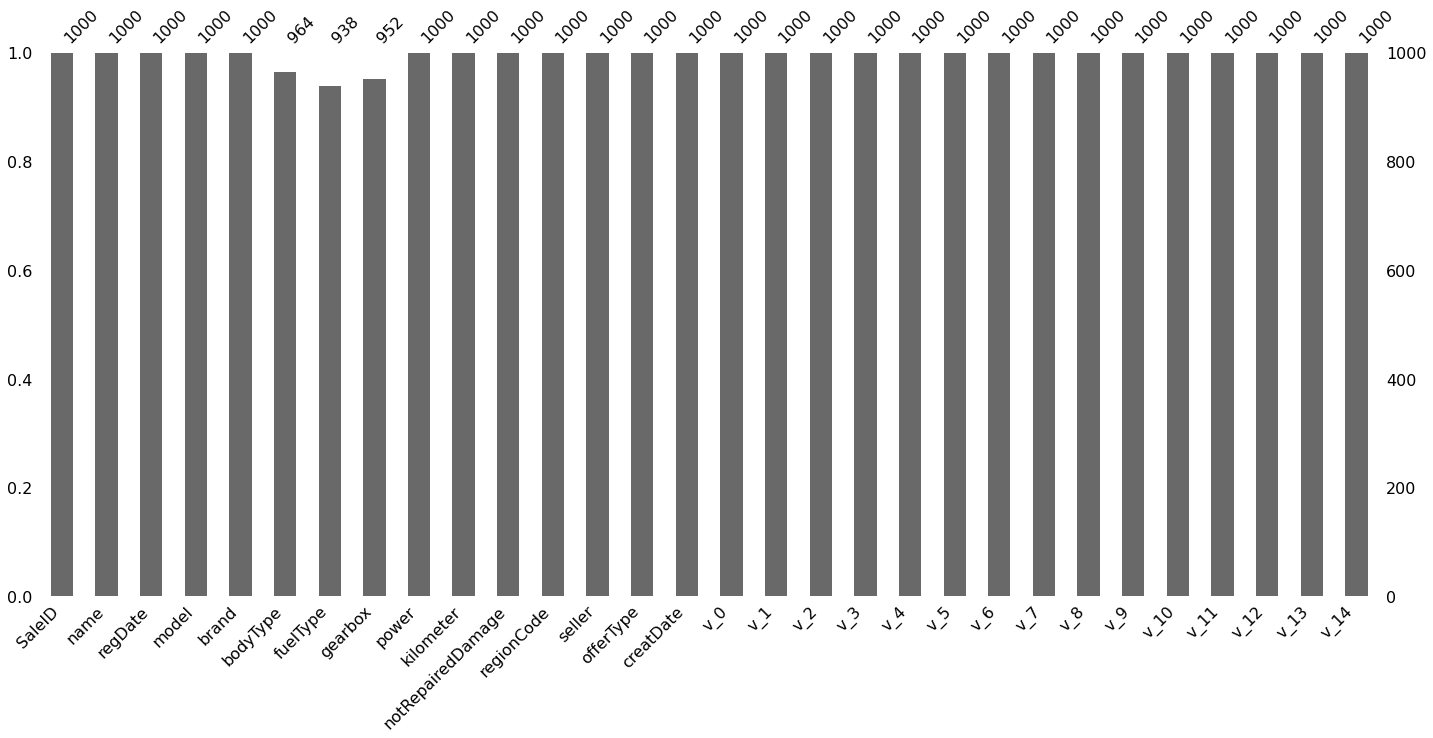

In [15]:
msno.bar(Test_data.sample(1000))

In [16]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

## “-”也为缺失值

In [5]:
#将“-”填充为缺失值
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [6]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [7]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [8]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [9]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [10]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

## 以下两特征倾斜严重，特征工程可考虑删除

In [11]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [12]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [13]:
del Train_data["seller"]
del Train_data["offerType"] 
del Test_data["seller"] 
del Test_data["offerType"]

# 了解预测值的分布

In [26]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

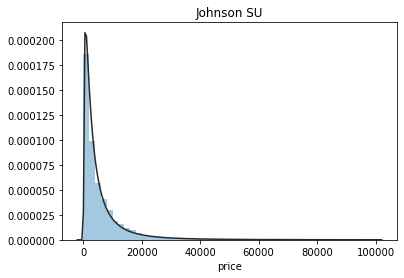

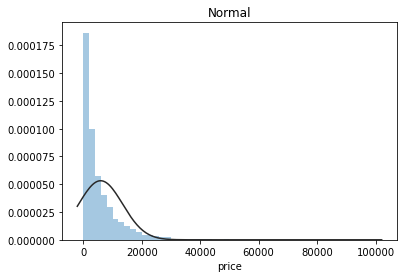

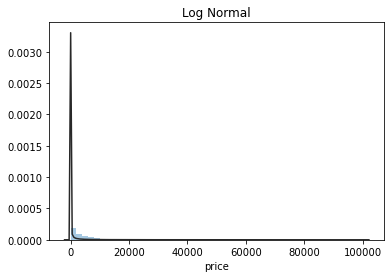

In [27]:
## 1) 总体分布概况（无界约翰逊分布等） 
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU') 
sns.distplot(y, kde=False, fit=st.johnsonsu) 
plt.figure(2); plt.title('Normal') 
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal') 
sns.distplot(y, kde=False, fit=st.lognorm)

## 价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但佳拟合是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


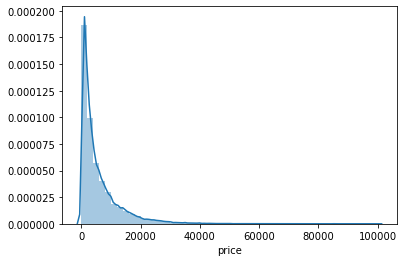

In [28]:
## 2) 查看skewness and kurtosis 
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew()) 
print("Kurtosis: %f" % Train_data['price'].kurt())

In [29]:
Train_data.skew(), Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

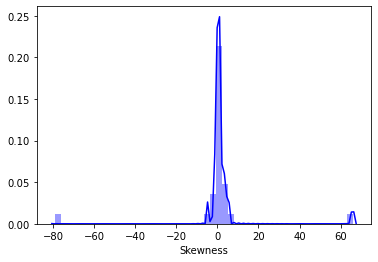

In [30]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

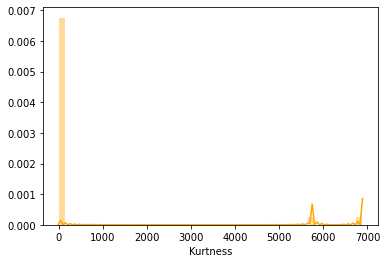

In [31]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

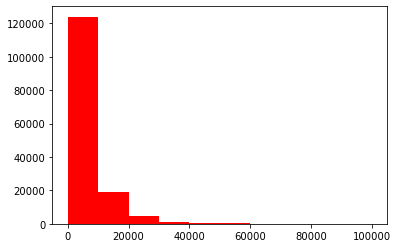

In [32]:
## 3) 查看预测值的具体频数 
plt.hist(Train_data['price'], 
orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

## 查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行


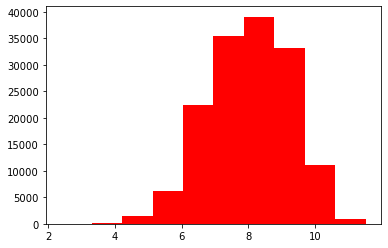

In [33]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

## 暂时先做log变换，johnsonsu变换后期再做

# 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [304]:
# 分离label即预测值
Y_train = Train_data['price']

In [305]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage','regionCode']

In [306]:
# 特征nunique分布 
for cat_fea in categorical_features:   
    print(cat_fea + "的特征分布如下：")    
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))    
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [307]:
# 特征nunique分布 
for cat_fea in categorical_features:    
    print(cat_fea + "的特征分布如下：")    
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))    
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个8不同的值
0.

#  数字特征分析

In [39]:
numeric_features.append('price')

In [40]:
## 1) 相关性分析 
price_numeric = Train_data[numeric_features] 
correlation = price_numeric.corr() 
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



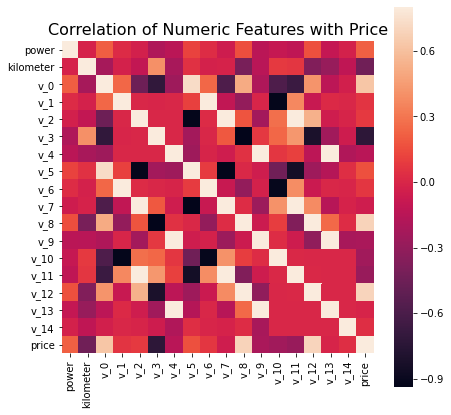

In [41]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [42]:
del price_numeric['price']

In [43]:
## 2) 查看几个特征得偏度和峰值 
for col in numeric_features:    
    print('{:15}'.format(col),          
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) ,         
          '   ' ,          
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())          
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


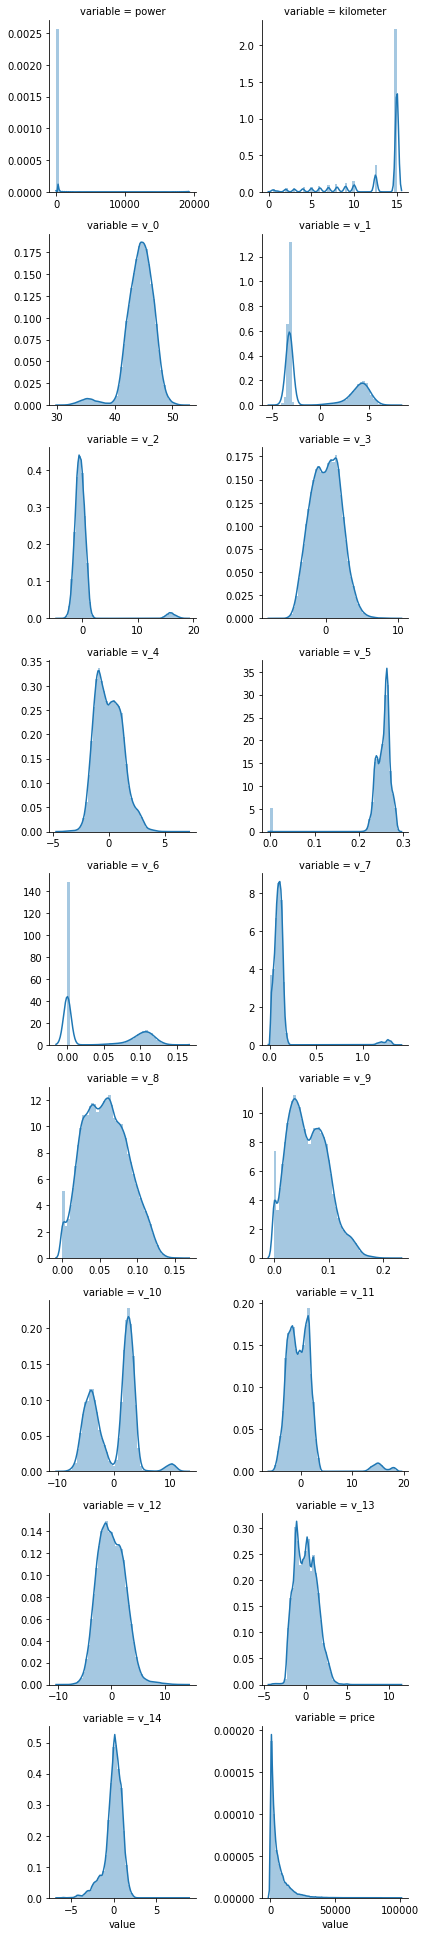

In [44]:
## 3) 每个数字特征得分布可视化 
f = pd.melt(Train_data, value_vars=numeric_features) 
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False) 
g = g.map(sns.distplot, "value")

In [ ]:
## 4) 数字特征相互之间的关系可视化 
sns.set() 
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14'] 
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde') 
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

# 类别特征分析

In [ ]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

In [ ]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [ ]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [ ]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

In [ ]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

# 3.特征工程

## 3.1.1删除异常值

In [14]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [15]:
delete_feature = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64
Delete number is: 10005
Now column number is: 139032
Description of data less than the lower bound is:
count    10005.000000
mean         2.435632
std          1.268291
min          0.500000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: kilometer, dtype: float64
Description of data larger than the upper bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: kilometer, dtype: float64
Delete numbe

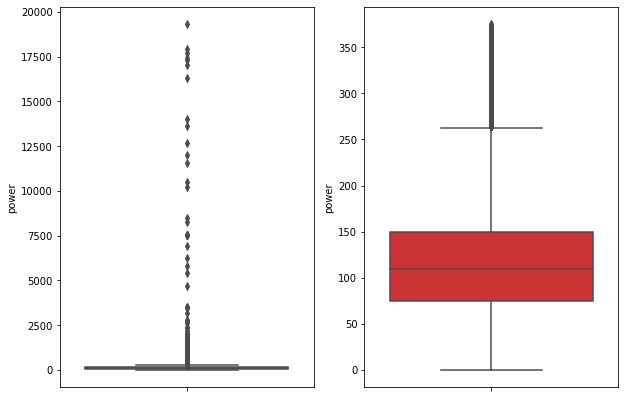

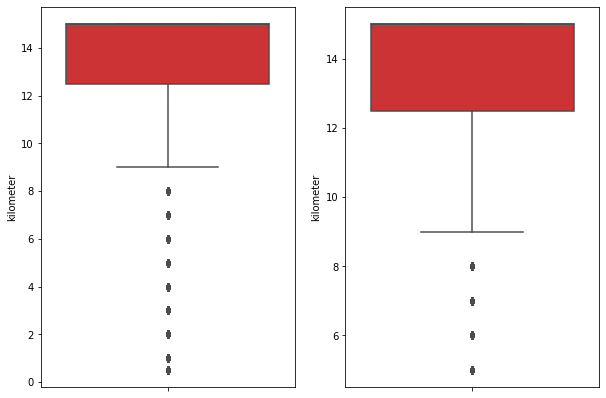

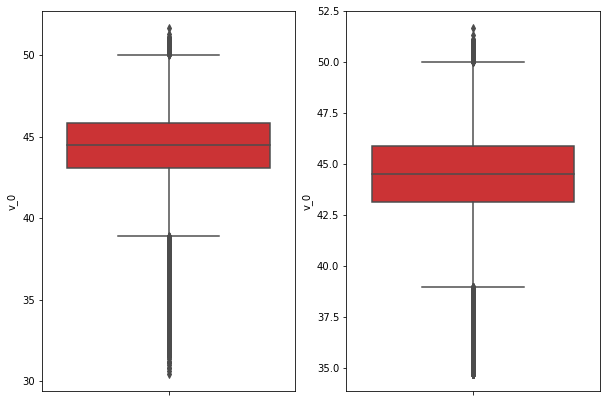

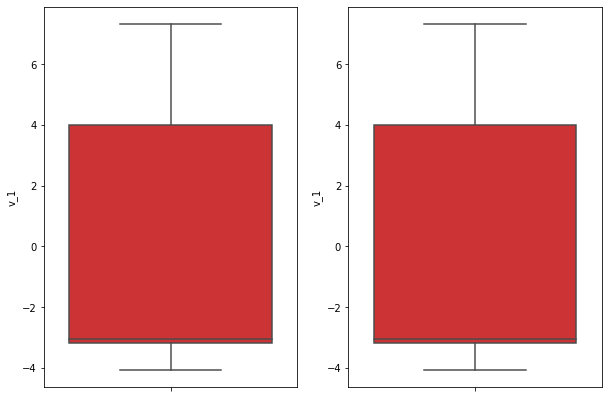

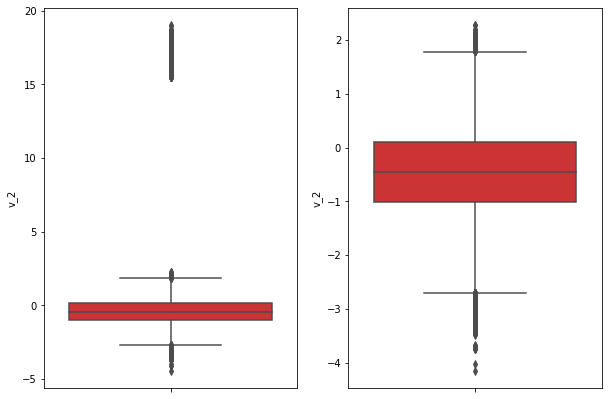

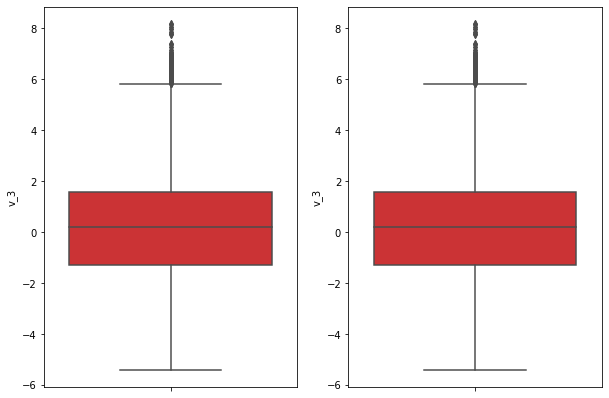

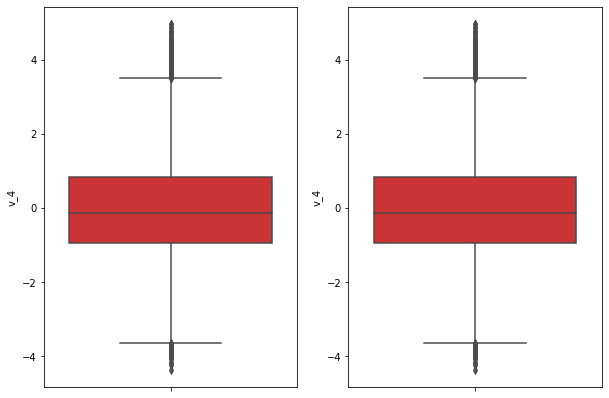

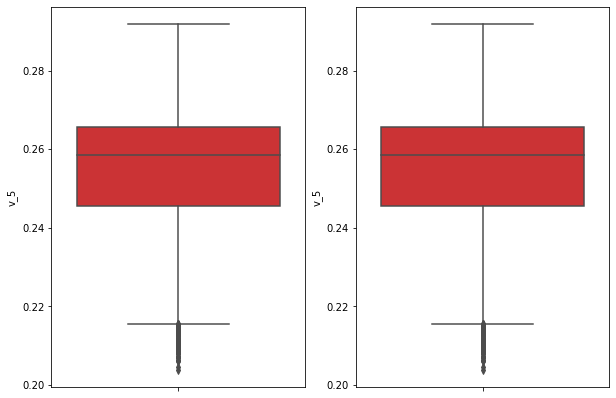

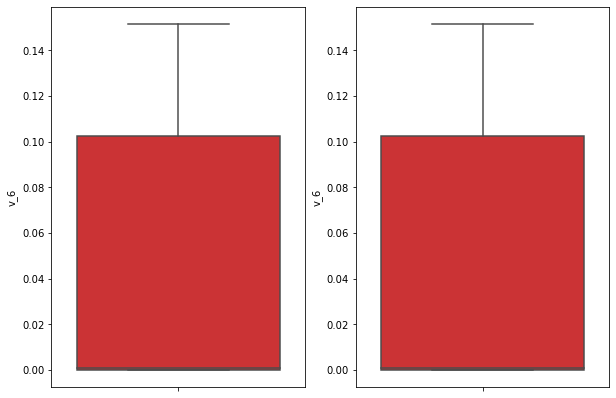

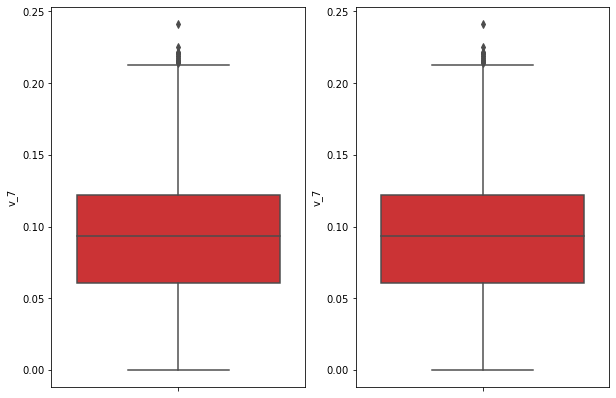

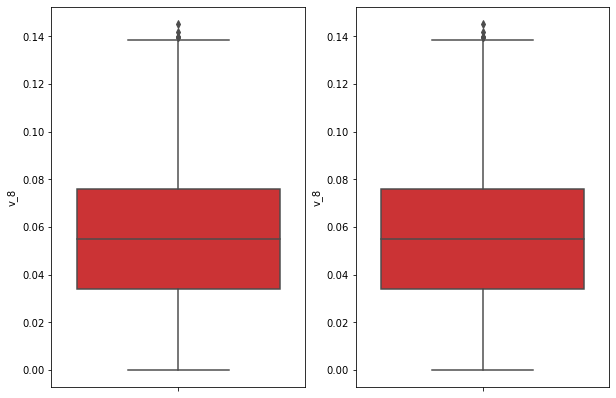

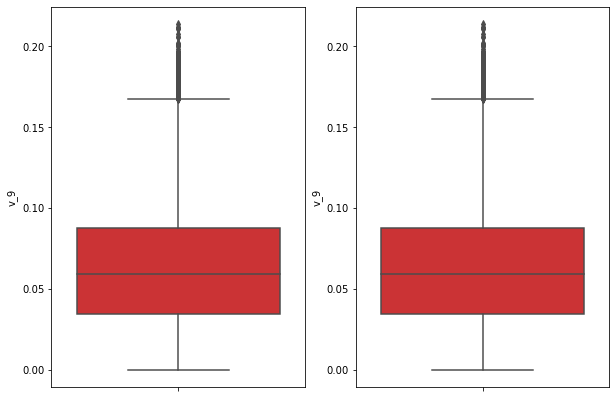

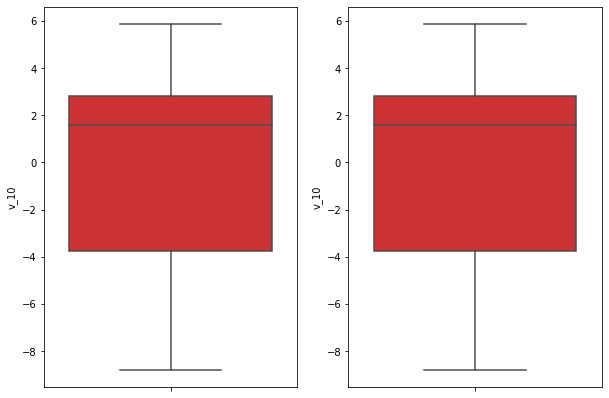

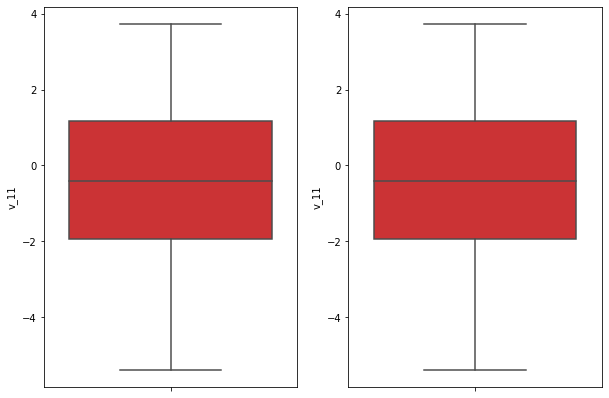

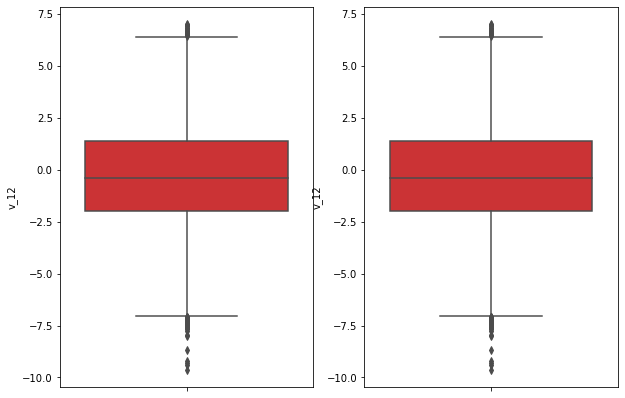

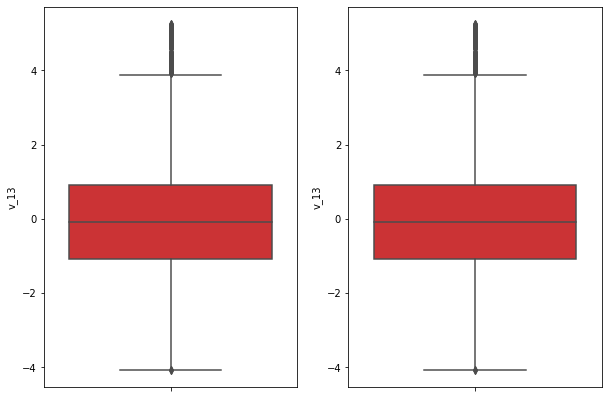

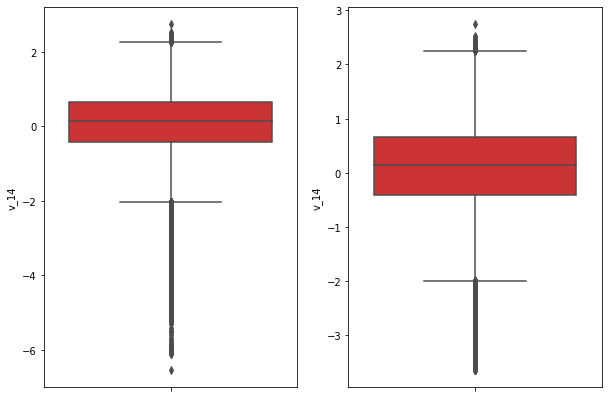

In [16]:
for i in delete_feature:
    Train_data = outliers_proc(Train_data, i, scale=3)

## 3.1.2特征构造

In [17]:
# 训练集和测试集放在一起，方便构造特征
Train_data['train']=1
Test_data['train']=0
data = pd.concat([Train_data, Test_data], ignore_index=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [18]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184193 entries, 0 to 184192
Data columns (total 31 columns):
SaleID               184193 non-null int64
bodyType             182780 non-null float64
brand                184193 non-null int64
creatDate            184193 non-null int64
fuelType             175458 non-null float64
gearbox              178564 non-null float64
kilometer            184193 non-null float64
model                184193 non-null float64
name                 184193 non-null int64
notRepairedDamage    156095 non-null object
power                184193 non-null int64
price                134193 non-null float64
regDate              184193 non-null int64
regionCode           184193 non-null int64
train                184193 non-null int64
v_0                  184193 non-null float64
v_1                  184193 non-null float64
v_10                 184193 non-null float64
v_11                 184193 non-null float64
v_12                 184193 non-null float64
v_13  

In [20]:
data['used_time'].isnull().sum()

12006

### 看一下空数据，有 10k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
### 但是这里不建议删除，因为删除缺失数据占总样本量过大，1/15
### 我们可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
### 回归模型可后续处理

In [21]:
# 从邮编中提取城市信息，相当于加入了先验知识
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data = data

In [22]:
# 计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
# 这里要以 train 的数据计算统计量
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [23]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [24]:
data.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,...,4385.0,1,9225.0,30333.0,1750.0,30.0,29441085.0,3811.927072,3191.10,5.0
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,NaN,...,4757.0,4,12462.0,84000.0,5900.0,100.0,100995183.0,7548.800913,8103.60,NaN
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,...,4382.0,2,1150.0,34990.0,7690.0,100.0,9984098.0,4431.347509,8674.28,16.0
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,...,7125.0,,12994.0,92900.0,5000.0,50.0,97524484.0,7259.485014,7504.77,19.0
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,...,1531.0,6,4292.0,28600.0,2299.0,50.0,13190599.0,2868.279907,3072.58,6.0


In [25]:
# 删除不需要的数据
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [46]:
print(data.shape)
data.columns

(155582, 37)


Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'name', 'notRepairedDamage', 'power', 'price', 'train', 'v_0',
       'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'city', 'brand_amount',
       'brand_price_max', 'brand_price_median', 'brand_price_min',
       'brand_price_sum', 'brand_price_std', 'brand_price_average',
       'power_bin'],
      dtype='object')

In [47]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出
#data.to_csv('data_for_tree.csv', index=0)

### 目前特征给树模型使用

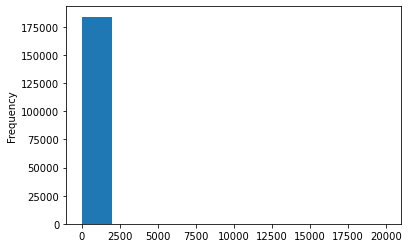

In [26]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
data['power'].plot.hist()

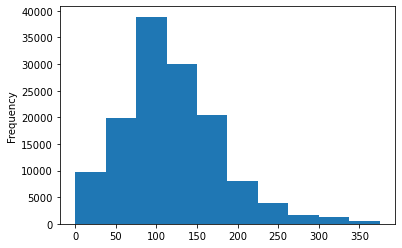

In [27]:
Train_data['power'].plot.hist()

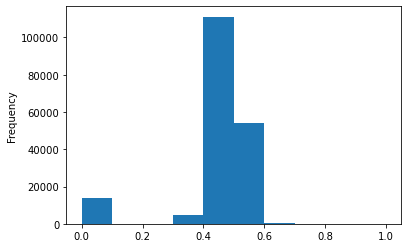

In [28]:
# 我们对其取 log，在做归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power']+1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

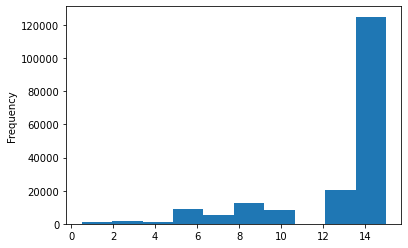

In [29]:
# km 的比较正常，应该是已经做过分桶了
data['kilometer'].plot.hist()

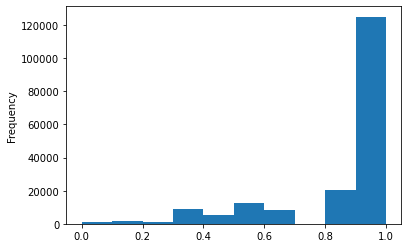

In [30]:
# 所以我们可以直接做归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [31]:
# 除此之外 还有我们刚刚构造的统计量特征：
# 'brand_amount', 'brand_price_average', 'brand_price_max',
# 'brand_price_median', 'brand_price_min', 'brand_price_std',
# 'brand_price_sum'
# 直接做变换，

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [32]:
'''
#对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                   'gearbox', 'notRepairedDamage', 'power_bin'])
'''

"\n#对类别特征进行 OneEncoder\ndata = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',\n                                   'gearbox', 'notRepairedDamage', 'power_bin'])\n"

In [33]:
print(data.shape)
data.columns

(184193, 37)


Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'name', 'notRepairedDamage', 'power', 'price', 'train', 'v_0',
       'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'city', 'brand_amount',
       'brand_price_max', 'brand_price_median', 'brand_price_min',
       'brand_price_sum', 'brand_price_std', 'brand_price_average',
       'power_bin'],
      dtype='object')

In [34]:
list(data.columns)

['SaleID',
 'bodyType',
 'brand',
 'fuelType',
 'gearbox',
 'kilometer',
 'model',
 'name',
 'notRepairedDamage',
 'power',
 'price',
 'train',
 'v_0',
 'v_1',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'used_time',
 'city',
 'brand_amount',
 'brand_price_max',
 'brand_price_median',
 'brand_price_min',
 'brand_price_sum',
 'brand_price_std',
 'brand_price_average',
 'power_bin']

## 计算各变量的相关系数，求多重共线性

# 模型预测及调参

In [35]:
TrainA_data = data.loc[data['train'].isin(['1'])]
TestA_data = data.loc[data['train'].isin(['0'])]

In [36]:
TrainA_data = TrainA_data.drop('train',axis=1,inplace=False)

In [37]:
TrainA_data.columns

Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'name', 'notRepairedDamage', 'power', 'price', 'v_0', 'v_1',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5',
       'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'city', 'brand_amount',
       'brand_price_max', 'brand_price_median', 'brand_price_min',
       'brand_price_sum', 'brand_price_std', 'brand_price_average',
       'power_bin'],
      dtype='object')

In [38]:
TrainA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134193 entries, 0 to 134192
Data columns (total 36 columns):
SaleID                 134193 non-null int64
bodyType               134193 non-null float64
brand                  134193 non-null int64
fuelType               128351 non-null float64
gearbox                130474 non-null float64
kilometer              134193 non-null float64
model                  134193 non-null float64
name                   134193 non-null int64
notRepairedDamage      114126 non-null object
power                  134193 non-null float64
price                  134193 non-null float64
v_0                    134193 non-null float64
v_1                    134193 non-null float64
v_10                   134193 non-null float64
v_11                   134193 non-null float64
v_12                   134193 non-null float64
v_13                   134193 non-null float64
v_14                   134193 non-null float64
v_2                    134193 non-null float64
v_3

### reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间

In [39]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [40]:
sample_feature = reduce_mem_usage(TrainA_data)

Memory usage of dataframe is 39721128.00 MB
Memory usage after optimization is: 11138507.00 MB
Decreased by 72.0%


### 提取训练特征

In [41]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','SaleID','model','brand']]

In [42]:
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
sample_feature['city']  = pd.to_numeric(sample_feature['city'],errors='coerce')
#sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
train = sample_feature[continuous_feature_names + ['price']]

train_X = train[continuous_feature_names]
train_y = train['price']

## 特征预处理

### 缺失值处理

### 众数填充['fuelType', 'gearbox','notRepairedDamage','used_time', 'power_bin','city']缺失值

In [43]:
for i in [ 'fuelType', 'gearbox','notRepairedDamage','used_time', 'power_bin','city']:
    train_X[i].fillna(train_X[i].mode()[0],inplace=True)

C:\Users\17499\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 均值填充'city'缺失值

In [44]:
train_X['city'].fillna(0,inplace=True)

C:\Users\17499\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
#按照平均数填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())

### 众数填充'city'缺失值

In [45]:
train_X['city'].fillna(train_X['city'].mode()[0],inplace=True)

C:\Users\17499\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 随机森林填充'city'缺失值

In [115]:
from sklearn.ensemble import RandomForestRegressor

# 将数据分成city等于0和不等于两部分
dataWind0 = train_X[train_X["city"]==0]
dataWindNot0 = train_X[train_X["city"]!=0]
#选定模型
rfModel_wind = RandomForestRegressor(n_estimators=100,random_state=50)
# 选定特征值
windColumns = [ 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'name','notRepairedDamage', 'power', 'v_0', 'v_1', 'v_10', 'v_11','v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8','v_9', 'used_time', 'brand_amount', 'brand_price_max','brand_price_median', 'brand_price_min', 'brand_price_sum','brand_price_std', 'brand_price_average', 'power_bin']
# 将city不等于0的数据作为训练集，fit到RandomForestRegressor之中
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["city"])
#通过训练好的模型预测city
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
train_X.loc[train_X.iloc[:,24]==0,"city"] = wind0Values
#将预测的city填充到city为零的数据中
'''
dataWind0.loc[:,"city"] = wind0Values
#连接两部分数据
train_X = dataWindNot0.append(dataWind0)
train_X.reset_index(inplace=True)
train_X.drop('index',inplace=True,axis=1)
'''

C:\Users\17499\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


'\ndataWind0.loc[:,"city"] = wind0Values\n#连接两部分数据\ntrain_X = dataWindNot0.append(dataWind0)\ntrain_X.reset_index(inplace=True)\ntrain_X.drop(\'index\',inplace=True,axis=1)\n'

In [46]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134193 entries, 0 to 134192
Data columns (total 32 columns):
bodyType               134193 non-null float16
fuelType               134193 non-null float16
gearbox                134193 non-null float16
kilometer              134193 non-null float16
name                   134193 non-null int32
notRepairedDamage      134193 non-null float32
power                  134193 non-null float16
v_0                    134193 non-null float16
v_1                    134193 non-null float16
v_10                   134193 non-null float16
v_11                   134193 non-null float16
v_12                   134193 non-null float16
v_13                   134193 non-null float16
v_14                   134193 non-null float16
v_2                    134193 non-null float16
v_3                    134193 non-null float16
v_4                    134193 non-null float16
v_5                    134193 non-null float16
v_6                    134193 non-null float1

### VIF检验多重共线性

In [47]:
def calulate_vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X[X.shape[1]]=1
    #vif
    vif=[]
    for i in range(X.shape[1]-1):
        vif.append(variance_inflation_factor(X.values,i))
    #result_out
    yy=pd.DataFrame(X.columns[:-1,])
    yy.rename(columns={0:"var_name"},inplace=True) 
    yy["vif"]=vif
    print(yy)

calulate_vif(train_X[[ 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'name',
       'notRepairedDamage', 'power', 'v_0', 'v_1', 'v_10', 'v_11',
       'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'power_bin']])

               var_name           vif
0              bodyType  1.639250e+00
1              fuelType  1.327791e+00
2               gearbox  1.303661e+00
3             kilometer  1.523680e+00
4                  name  1.730886e+00
5     notRepairedDamage  1.080046e+00
6                 power  1.212965e+00
7                   v_0  4.073074e+04
8                   v_1  1.355600e+07
9                  v_10  8.849900e+06
10                 v_11  4.568279e+06
11                 v_12  1.024623e+07
12                 v_13  1.210996e+05
13                 v_14  2.233172e+02
14                  v_2  1.673134e+06
15                  v_3  2.143719e+06
16                  v_4  5.227496e+04
17                  v_5  4.846695e+04
18                  v_6  6.547816e+04
19                  v_7  1.431533e+04
20                  v_8  1.479810e+04
21                  v_9  2.002390e+04
22            used_time  5.199614e+00
23                 city  1.056094e+00
24         brand_amount  2.738597e+01
25      bran

### 相关系数检验多重共线性

                     bodyType  fuelType  gearbox  kilometer      name  \
bodyType             1.000000  0.128830      NaN  -0.028196  0.035776   
fuelType             0.128830  1.000000      NaN   0.110944  0.008141   
gearbox                   NaN       NaN      NaN        NaN       NaN   
kilometer           -0.028196  0.110944      NaN   1.000000  0.026655   
name                 0.035776  0.008141      NaN   0.026655  1.000000   
notRepairedDamage   -0.008734 -0.032748      NaN   0.086099  0.016646   
power                0.080951  0.080629      NaN  -0.067327 -0.033080   
v_0                  0.266137  0.329721      NaN  -0.275867 -0.153046   
v_1                 -0.011098  0.004975      NaN  -0.065445 -0.650562   
v_10                -0.067350 -0.081575      NaN   0.126097  0.626614   
v_11                -0.265219 -0.181280      NaN   0.082730 -0.555876   
v_12                 0.182623  0.344974      NaN  -0.381668  0.058145   
v_13                -0.031188 -0.017350      NaN  -

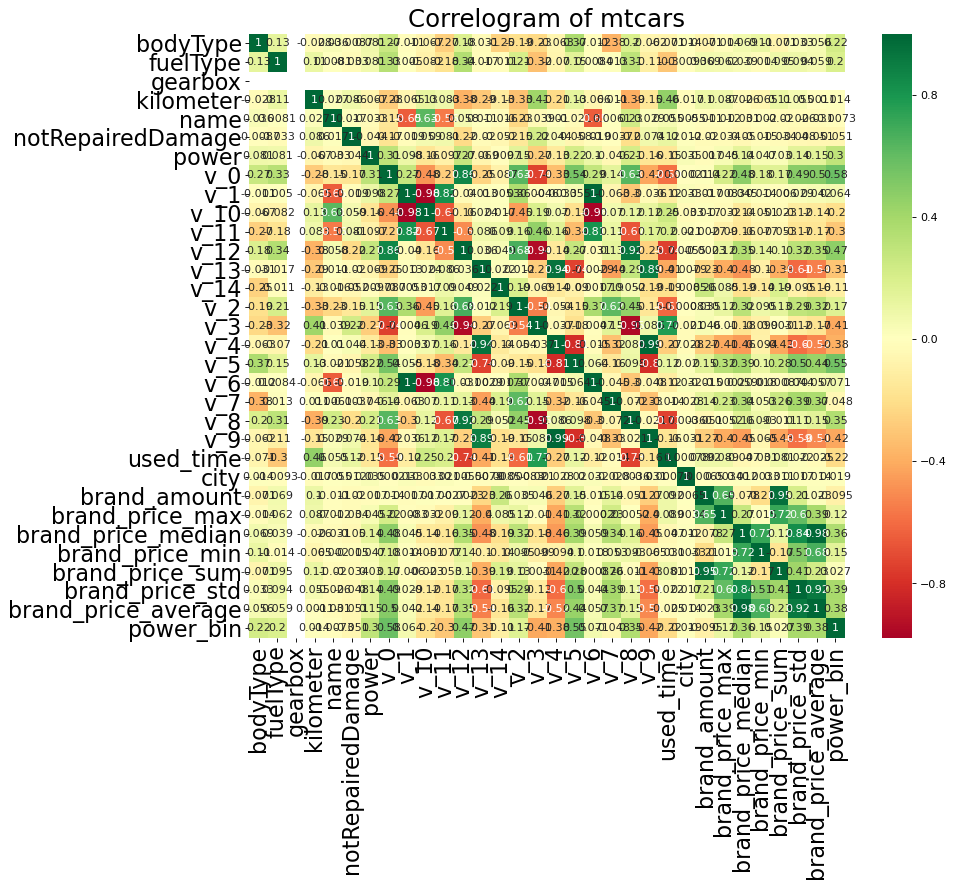

In [68]:
def calulate_cor(cor_data):
    # calculate pearson cor
    coefficient1 =cor_data.corr(method = 'pearson')
    print(coefficient1)
    # Plot
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(cor_data.corr(), xticklabels=cor_data.corr().columns, yticklabels=cor_data.corr().columns, cmap='RdYlGn', center=0, annot=True)
    # Decorations
    plt.title('Correlogram of mtcars', fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
calulate_cor((train_X[[ 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'name',
       'notRepairedDamage', 'power', 'v_0', 'v_1', 'v_10', 'v_11',
       'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'power_bin']]))

In [112]:
all_features = [ 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'name',
       'notRepairedDamage', 'power', 'v_0', 'v_1', 'v_10', 'v_11',
       'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'power_bin']

In [113]:
correlation = train_X[futrue_labels].corr()

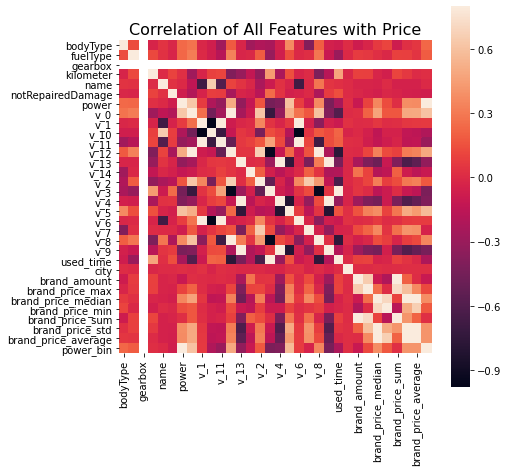

In [114]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of All Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(train_X,train_y)

### 直接删除缺失值，查看模型预测效果

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [67]:
model = Ridge(normalize=True)

In [68]:
#reg = sm.OLS(train_y,train_X)

In [69]:
'''
model_1 = reg.fit()
model_1.summary()
'''

'\nmodel_1 = reg.fit()\nmodel_1.summary()\n'

In [70]:
model = model.fit(train_X,train_y)

In [71]:
'intercept:'+ str(model.intercept_)

sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_8', 21348.99692688491),
 ('v_5', 12179.51437013784),
 ('brand_price_min', 6211.122702415663),
 ('brand_price_median', 3060.6523305184783),
 ('brand_price_average', 2917.83969065547),
 ('brand_price_std', 1751.089224714996),
 ('v_6', 1568.8962356955055),
 ('power', 857.6624335576284),
 ('gearbox', 738.9419330076851),
 ('brand_price_max', 517.2319286495124),
 ('v_2', 497.96352360701525),
 ('v_0', 314.8416505379191),
 ('v_12', 277.0645016084576),
 ('brand_amount', 244.40850976698263),
 ('fuelType', 172.9001401818833),
 ('bodyType', 149.662472161216),
 ('v_14', 138.72988678053403),
 ('brand_price_sum', 123.3306676257318),
 ('v_13', 98.06733641727536),
 ('power_bin', 86.11161196472773),
 ('v_1', 20.439679001034587),
 ('city', 15.092456846770135),
 ('v_4', 8.418827981057088),
 ('name', 0.0002152054229257506),
 ('used_time', -0.2845198028638949),
 ('v_10', -61.160722650874675),
 ('v_11', -148.2292442667685),
 ('notRepairedDamage', -300.07198601499505),
 ('v_3', -328.2950964737036),
 ('v_

In [72]:
from matplotlib import pyplot as plt

In [73]:
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

The predicted price is obvious different from true price


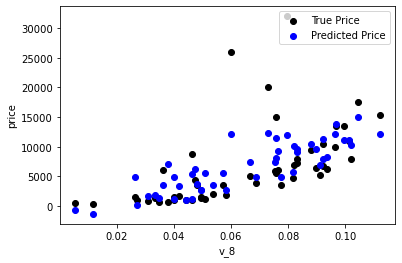

In [74]:
plt.scatter(train_X['v_8'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_8'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_8')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

It is clear to see the price shows a typical exponential distribution


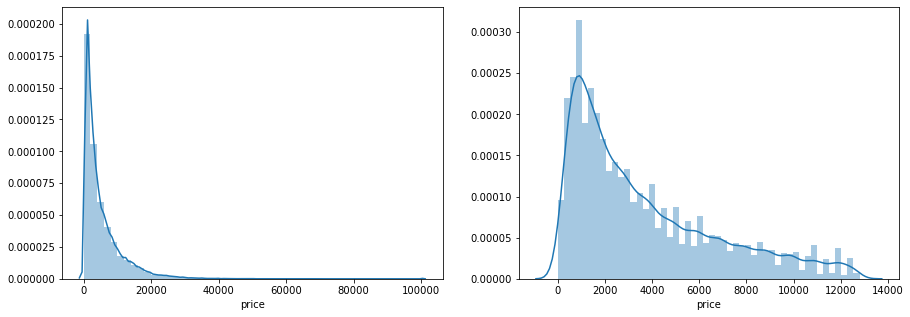

In [75]:
import seaborn as sns
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

In [76]:
train_y_ln = np.log(train_y+1)

The transformed price seems like normal distribution


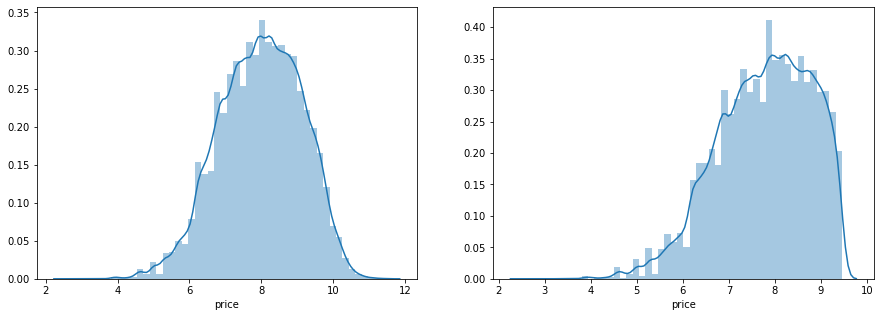

In [77]:
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [78]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:3.7656100822347955


[('v_8', 5.39869027590798),
 ('v_5', 3.4905543933387766),
 ('v_6', 0.5233798779716436),
 ('power', 0.28819299394893216),
 ('brand_price_median', 0.25776672986243715),
 ('brand_price_average', 0.2529981204609507),
 ('brand_price_std', 0.17798981962179566),
 ('v_2', 0.1241109879098072),
 ('v_0', 0.0731313101990863),
 ('brand_price_min', 0.07312756914866773),
 ('v_12', 0.07024911246806752),
 ('gearbox', 0.05992460315009797),
 ('brand_price_max', 0.05812791957428762),
 ('fuelType', 0.052832117174946146),
 ('brand_price_sum', 0.04054008478041685),
 ('v_14', 0.02745756816173488),
 ('v_13', 0.026366930585389848),
 ('brand_amount', 0.02229191122607057),
 ('bodyType', 0.01654963763564474),
 ('power_bin', 0.012748693333437292),
 ('v_1', 0.00744005594409123),
 ('name', -1.3264874379787738e-07),
 ('used_time', -5.732694346021885e-05),
 ('city', -0.0011058557409385507),
 ('v_4', -0.008058078746049455),
 ('v_10', -0.01729175725042974),
 ('v_11', -0.032582834852595034),
 ('v_3', -0.08890015251144907)

The predicted price seems normal after np.log transforming


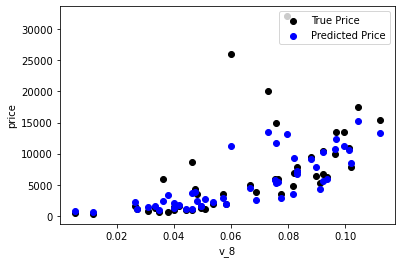

In [79]:
plt.scatter(train_X['v_8'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_8'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_8')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

### 五折交叉验证

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [81]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

#### 未log变换的平均MAE

In [82]:
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doin

In [83]:
print('AVG:', np.mean(scores))

AVG: 1.0944798500243742


#### log变换后的平均MAE

In [84]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [85]:
print('AVG:', np.mean(scores))

AVG: 0.2554471572495283


In [86]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.255407,0.256272,0.256262,0.251484,0.257811


### 符合真实业务，前4/5作为训练集，后1/5作为测试集

In [89]:
import datetime

In [90]:
sample_feature = sample_feature.reset_index(drop=True)

In [91]:
split_point = len(sample_feature) // 5 * 4

In [92]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price'] + 1)
val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price'] + 1)

In [93]:
model = model.fit(train_X, train_y_ln)

In [94]:
mean_absolute_error(val_y_ln, model.predict(val_X))

0.21005346191834043

In [95]:
from sklearn.model_selection import learning_curve, validation_curve

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'C:\\Users\\17499\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

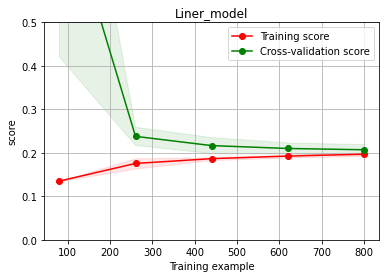

In [97]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

In [98]:
train = sample_feature[continuous_feature_names + ['price']].dropna()

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

## 三类线性模型的对比

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [100]:
from sklearn.metrics import mean_absolute_error,  make_scorer,mean_squared_error,r2_score

In [101]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [102]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [103]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.202650,0.206573,0.462767
cv2,0.207583,0.211453,0.455661
cv3,0.209063,0.213077,0.469703
cv4,0.202504,0.206379,0.455205
cv5,0.209891,0.213594,0.457737


In [104]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(r2_score))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [105]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.918800,0.917121,0.629036
cv2,0.915691,0.913663,0.637615
cv3,0.917241,0.915162,0.633426
cv4,0.919510,0.917886,0.644954
cv5,0.912565,0.910454,0.630511


intercept:18.312817300744992


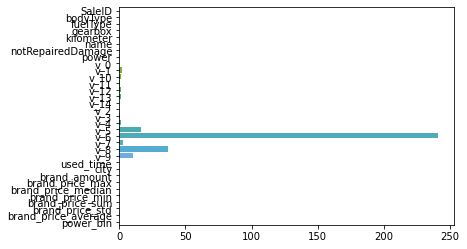

In [220]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:2.866710361966631


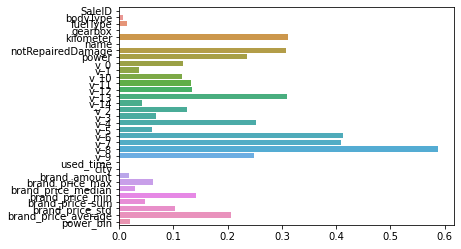

In [221]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:9.491193941449653


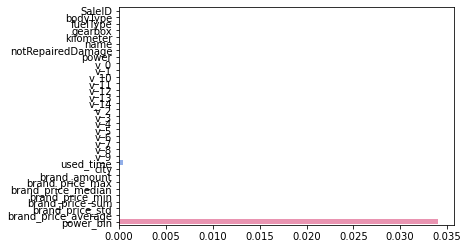

In [222]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

## 非线性回归模型对比

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [224]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [225]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [226]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.202650,0.220031,0.155398,0.176529,78.960766,0.151115,0.150120
cv2,0.207583,0.207804,0.156284,0.180288,28.387168,0.151284,0.155616
cv3,0.209063,0.205186,0.156149,0.180715,21.997296,0.152670,0.156677
cv4,0.202504,0.206962,0.154179,0.175602,18.062047,0.148327,0.151494
cv5,0.209891,0.217562,0.159808,0.182953,35.702614,0.156968,0.154858


## 模型调参

### GRIDCV网格搜索

In [136]:
## LGB的参数集合：

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(train_X, train_y)

In [139]:
clf.best_params_

{'max_depth': 15, 'num_leaves': 55, 'objective': 'regression'}

In [140]:
model = LGBMRegressor(objective='regression',
                          num_leaves=55,
                          max_depth=15)

In [141]:
np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))

0.14822510651607476